In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [199]:
file_path = os.path.join('../../../','raw_data/')
in_output_path = os.path.join('../../../','processed_data/IP_final.csv')
os.listdir(file_path)

['Test-1542969243754.csv',
 'Test_Beneficiarydata-1542969243754.csv',
 'Test_Inpatientdata-1542969243754.csv',
 'Test_Outpatientdata-1542969243754.csv',
 'Train-1542865627584.csv',
 'Train_Beneficiarydata-1542865627584.csv',
 'Train_Inpatientdata-1542865627584.csv',
 'Train_Outpatientdata-1542865627584.csv']

In [105]:
provider = pd.read_csv(os.path.join(file_path,'Train-1542865627584.csv'))
in_patient = pd.read_csv(os.path.join(file_path,'Train_Inpatientdata-1542865627584.csv'))
out_patient = pd.read_csv(os.path.join(file_path,'Train_Outpatientdata-1542865627584.csv'))
benefit = pd.read_csv(os.path.join(file_path,'Train_Beneficiarydata-1542865627584.csv'))

In [231]:
prv_g = in_patient.groupby(['Provider'], as_index=False).agg({'ClaimID':'nunique', 'BeneID':'nunique',
                                                              'InscClaimAmtReimbursed':'mean' }) 

prv_g = prv_g.rename(columns={'BeneID':'TotalPatient','ClaimID':'TotalClaim',
                              'InscClaimAmtReimbursed':'AvgClaimAmtReimbursed' })

In [225]:
top_f = in_patient[in_patient.ClmAdmitDiagnosisCode.isin(['78650', '78605', '486', '4280', '7802', 'V5789', '78097', '78900',
       '78079', '49121', '42731', '71536', '5990', '5789', '78060',
       '0389', '78659', '41401', '78609', '43491'])]


In [226]:
topf_g = top_f.groupby(['Provider'], as_index=False).agg({'ClaimID':'nunique'}).reset_index() 
topf_g = topf_g.rename(columns={'ClaimID':'NumTopCodeClaim'}).drop('index', axis=1)
prv_g =prv_g.merge(topf_g, how='inner',on='Provider')

In [239]:
phy = in_patient.groupby('AttendingPhysician')['Provider'].size().reset_index()

phy = phy[phy['Provider']>1]

dup = in_patient[in_patient.AttendingPhysician.isin(phy.AttendingPhysician)]

dup_g = dup.groupby('Provider')['ClaimID'].size().reset_index()

dup_g['SharePhysician'] = 1

prv_g1 = dup_g.merge(prv_g,how='right',on=['Provider']).drop('ClaimID',axis=1)

prv_g1.SharePhysician = prv_g1.SharePhysician.fillna(0)
prv_g1.to_csv(in_output_path,index=False)
prv_g1

In [211]:
pd.merge(dup_g,prv_g,how='right',on=['Provider']) #.drop('ClaimID',axis=1)

TypeError: 'DataFrame' object is not callable

In [192]:
# missing_col_out = list(set(in_patient.columns.to_list()) - set(out_patient.columns.to_list()))

# out_patient = out_patient.reindex(columns=out_patient.columns.to_list() + missing_col_out)

# patient = pd.concat([in_patient,out_patient])

# all_merge = pd.merge(patient,provider,how='inner', on=['Provider'])

In [193]:
# all_merge.PotentialFraud.value_counts().plot(kind='bar')

In [184]:
in_patient[in_patient.AttendingPhysician.isin(phy.AttendingPhysician)]

In [185]:
no_dup_g = no_dup.groupby('Provider')['ClaimID'].size().reset_index()

In [186]:
no_dup_g.head()

,Provider,ClaimID
0,PRV51001,3
1,PRV51007,1
2,PRV51008,2
3,PRV51011,1
4,PRV51021,1


(0, 15000)

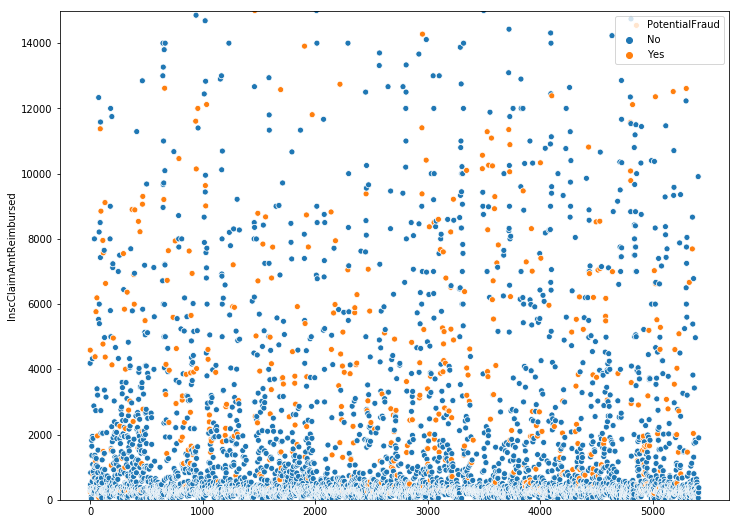

In [71]:
plt.figure(figsize=(12,9))
ax = sns.scatterplot(x=pd.Series(prv_g.index),y='InscClaimAmtReimbursed',hue='PotentialFraud',data=prv_g)
plt.ylim(0,15000)

(0, 30000)

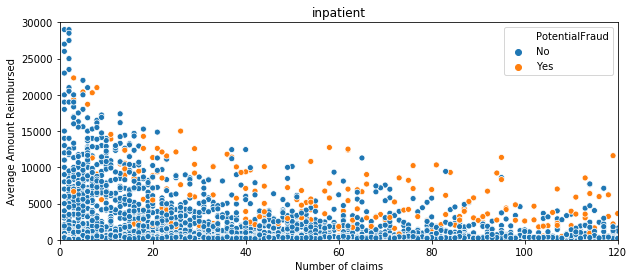

In [57]:
plt.figure(figsize=(10,4))
ax = sns.scatterplot(x='ClaimID',y='InscClaimAmtReimbursed',hue='PotentialFraud', data=prv_g)
plt.xlim(0,120)
plt.xlabel('Number of claims')
plt.ylabel('Average Amount Reimbursed')
plt.title('inpatient')
plt.ylim(0,30000)
# plt.savefig('../output/IP_Claim_Reimbusement.png')

(0, 120)

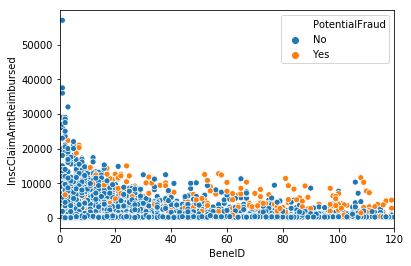

In [77]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x='BeneID',y='InscClaimAmtReimbursed',hue='PotentialFraud',data=prv_g)
plt.xlim(0,120)

(0, 2000)

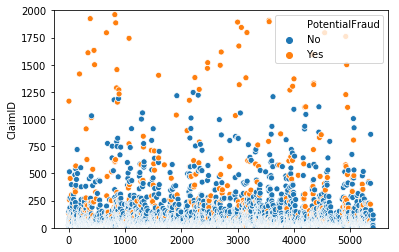

In [92]:
#plt.figure(figsize=(8,12))
ax=sns.scatterplot(x=prv_g.index,y='ClaimID',hue='PotentialFraud',data=prv_g )
plt.ylim(0,2000)

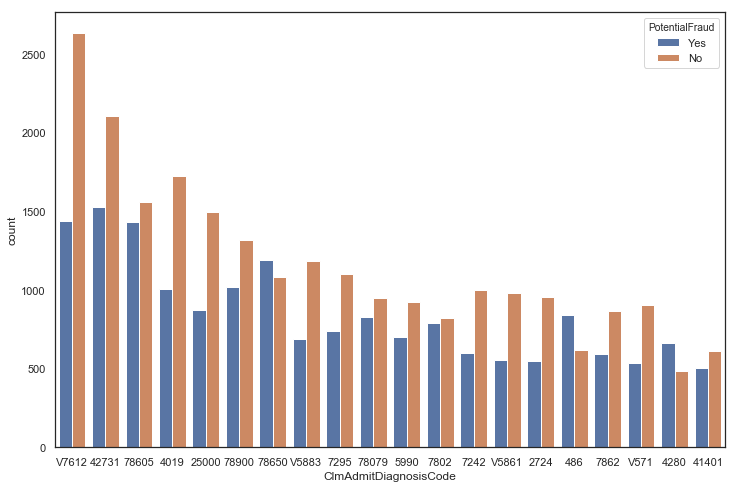

In [102]:
top_f = all_merge[all_merge.ClmAdmitDiagnosisCode.isin(['78650', '78605', '486', '4280', '7802', 'V5789', '78097', '78900',
       '78079', '49121', '42731', '71536', '5990', '5789', '78060',
       '0389', '78659', '41401', '78609', '43491'])]

sns.set(rc={'figure.figsize':(12,8)},style='white')
ax=sns.countplot(x='ClmAdmitDiagnosisCode',hue='PotentialFraud',data=all_merge,
                 order=all_merge.ClmAdmitDiagnosisCode.value_counts().iloc[:20].index)

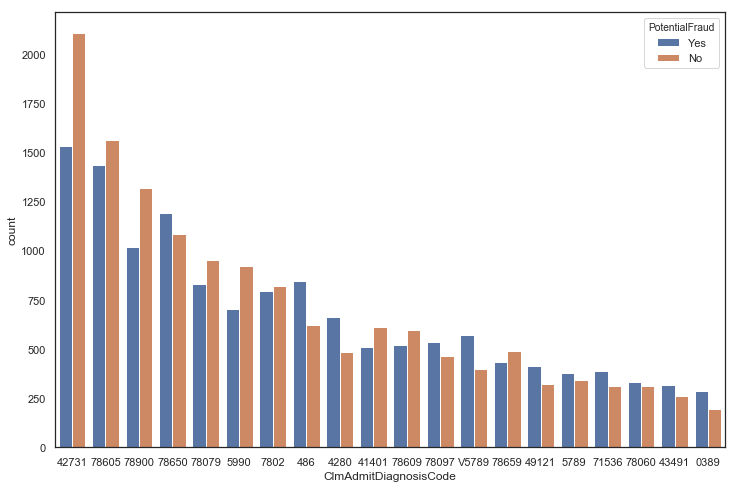

In [101]:
sns.set(rc={'figure.figsize':(12,8)},style='white')
ax=sns.countplot(x='ClmAdmitDiagnosisCode',hue='PotentialFraud',data=top_f,
                 order=top_f.ClmAdmitDiagnosisCode.value_counts().iloc[:20].index)